<a href="https://colab.research.google.com/github/Abdulrahmann-Omar/SVM-Using-SGD/blob/main/MATH_PRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions


In [7]:
class SVC:
    def __init__(self, lr_rt=0.001, reg=0.1, itr=2000):
        self.lr = lr_rt #learning rate
        self.reg = reg #regularization param
        self.itr = itr #no of iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y = np.where(y <= 0, -1, 1)   #make binary classification
        for _ in range(self.itr):
            for idx, x_i in enumerate(X):
                eq = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if eq:
                    # Use self.reg instead of self.lam
                    self.weights -= self.lr * (2 * self.reg * self.weights)
                else:
                    # Use self.reg instead of self.lam
                    self.weights -= self.lr * (2 * self.reg * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.lr * y[idx]

    def predict(self, X):
        res = np.dot(X, self.weights) - self.bias
        return np.sign(res)

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2, :2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:


svm_builtin = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
svm_builtin.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [10]:
svm = SVC()
svm.fit(X_train, y_train)

In [11]:
y_pred_FS = svm.predict(X_test)
y_pred_FS = np.where(y_pred_FS == -1, 0, 1)

In [12]:
print("Accuracy of from scratch SVC soft margin:", accuracy_score(y_test, y_pred_FS))

Accuracy of from scratch SVC soft margin: 1.0


In [13]:
predictions_builtin = svm_builtin.predict(X_test)

In [14]:
accuracy_sgd = np.mean(y_pred_FS == y_test)
accuracy_builtin = np.mean(predictions_builtin == y_test)

print(f"Custom SVM Accuracy: {accuracy_sgd * 100}%")
print(f"Built-in SVM (SGDClassifier) Accuracy: {accuracy_builtin * 100}%")



Custom SVM Accuracy: 100.0%
Built-in SVM (SGDClassifier) Accuracy: 100.0%


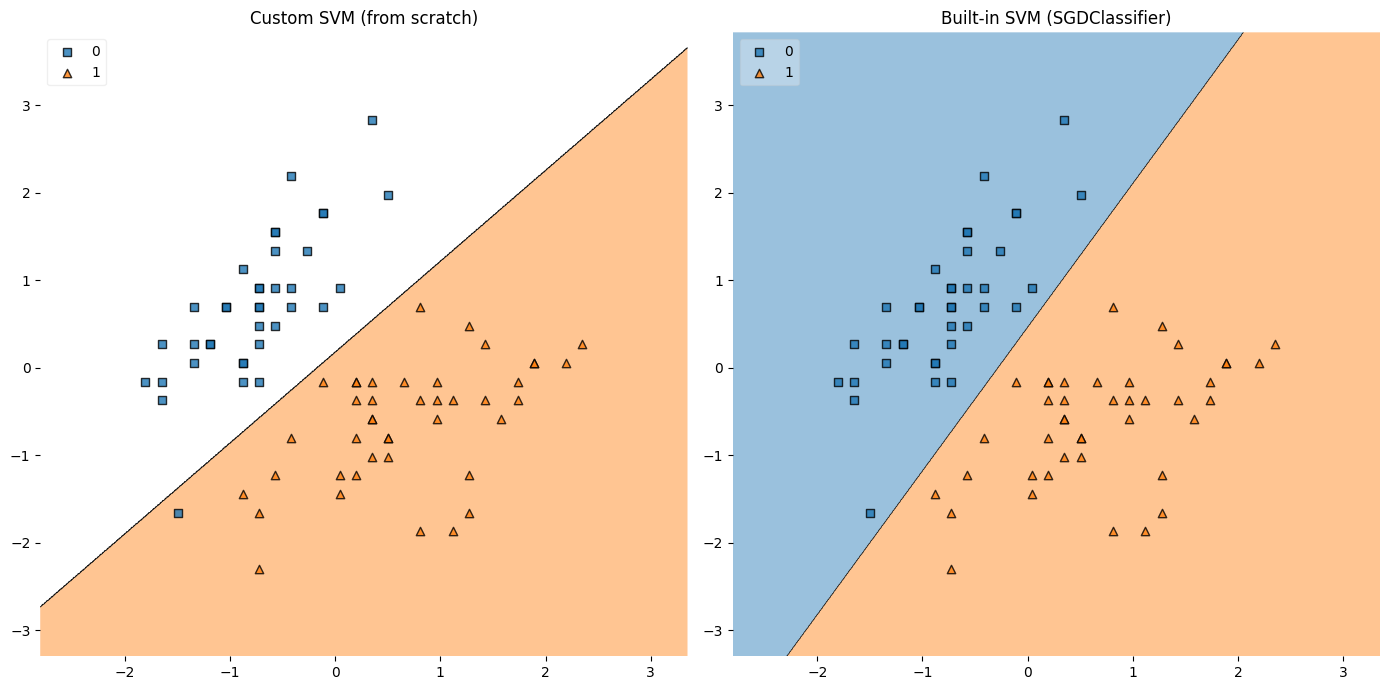

In [15]:
fig = plt.figure(figsize=(14, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax0 = plt.subplot(gs[0])
plot_decision_regions(X_train, y_train, clf=svm, legend=2)
ax0.set_title('Custom SVM (from scratch)')

ax1 = plt.subplot(gs[1])
plot_decision_regions(X_train, y_train, clf=svm_builtin, legend=2)
ax1.set_title('Built-in SVM (SGDClassifier)')

plt.tight_layout()
plt.show()

<ipython-input-16-1a0acdddec70>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


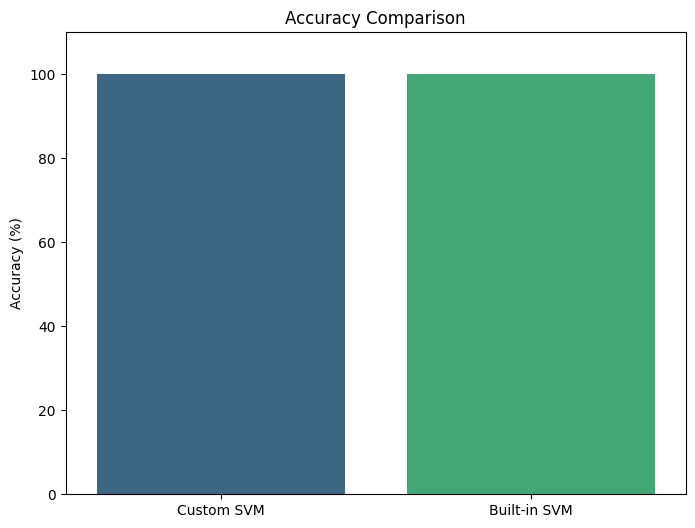

In [16]:
models = ['Custom SVM', 'Built-in SVM']
accuracies = [accuracy_sgd * 100, accuracy_builtin * 100]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.ylim(0, 110)
plt.show()


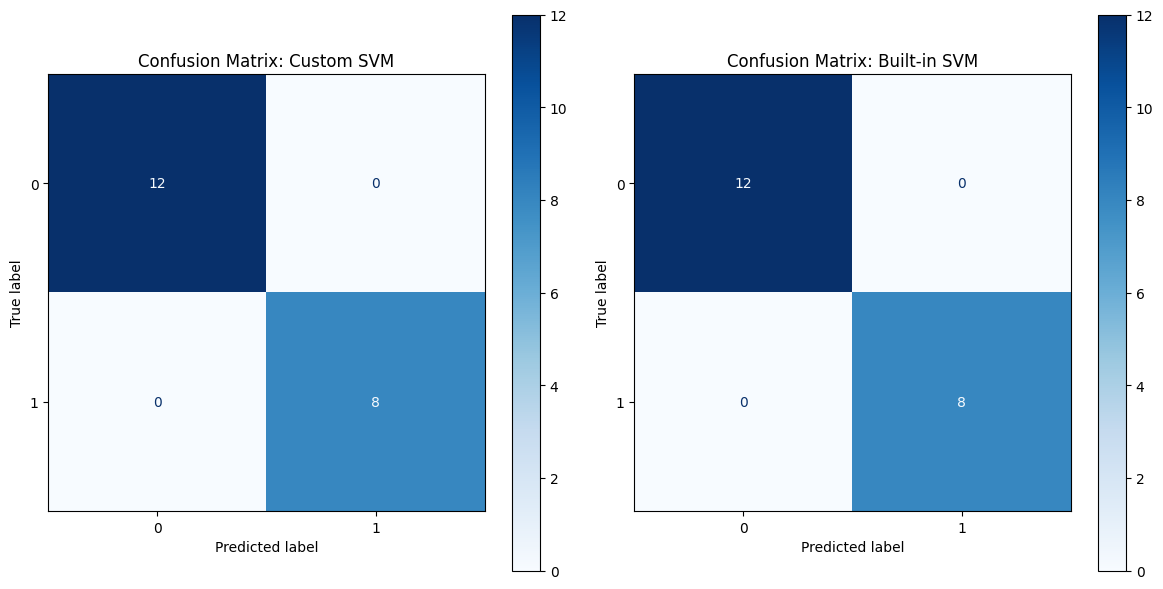

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_sgd = confusion_matrix(y_test, y_pred_FS)
cm_builtin = confusion_matrix(y_test, predictions_builtin)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


ConfusionMatrixDisplay(cm_sgd).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix: Custom SVM')

ConfusionMatrixDisplay(cm_builtin).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix: Built-in SVM')

plt.tight_layout()
plt.show()


#Real-life Application

in this part, we used Fraud Detection Dataset to classify Fraud and non-fraud transactions

first, we have to make preprocessing on the datase

##Preprocessing

In [28]:
df = pd.read_csv("creditcard.csv")


In [29]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0


In [30]:
df.fillna(df.mean(), inplace=True)

In [31]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.000000
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.000000
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.000000
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.000000
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.330000,0.000000
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.790000,0.000000
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.750000,0.000000
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.950000,0.000000


In [32]:
df.drop_duplicates(inplace=True)

In [33]:
X = df.drop('Class', axis=1)
y = df['Class']

In [34]:
y.value_counts()

,count
Class,
0.000000,25649
1.000000,88
0.003406,1


In [35]:
df['Class'] = df['Class'].astype(int)

In [36]:
y.astype(int)

,Class
0,0
1,0
2,0
3,0
4,0
...,...
25833,0
25834,0
25835,0
25836,0


In [37]:
df.drop_duplicates(inplace=True)

# Check for missing values in 'Class'
assert df['Class'].isna().sum() == 0, "Missing values found in 'Class' column."
# Convert 'Class' to integer
df['Class'] = df['Class'].astype(int)

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']


In [38]:
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (20590, 30), X_test shape: (5148, 30)


In [39]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [40]:
print(f"After SMOTE: \n{y_train_resampled.value_counts()}")

After SMOTE: 
Class
0    20520
1    20520
Name: count, dtype: int64


In [41]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##using SVM with SGD to make predictions on this dataset, this help us to know the fraud and nonfraud transactions to minimize the loss

In [42]:


svm_builtin = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
svm_builtin.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_builtin.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM with SGD: {accuracy * 100:.2f}%")

Accuracy of the SVM with SGD: 99.81%


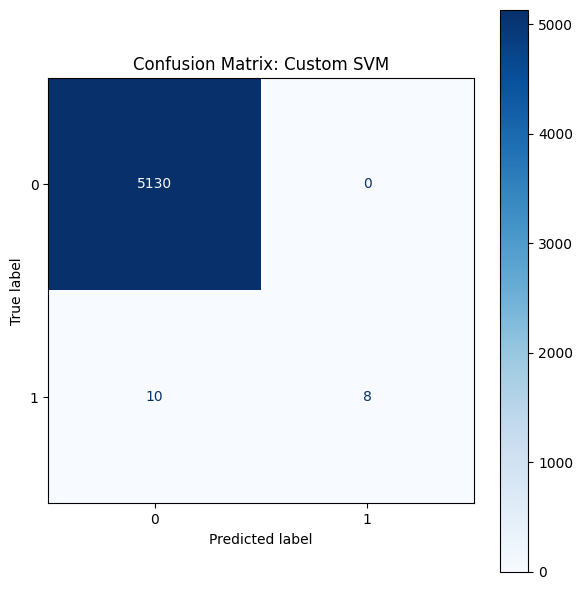

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 6))

ConfusionMatrixDisplay(cm).plot(ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix: Custom SVM')

plt.tight_layout()
plt.show()
